In [99]:
import tensorflow as tf;

In [2]:
x = tf.constant(10)
x

<tf.Tensor 'Const:0' shape=() dtype=int32>

In [3]:
y = tf.constant(20)

In [4]:
type(y)

tensorflow.python.framework.ops.Tensor

In [5]:
sess = tf.Session()

In [6]:
sess.run(x+y)

30

In [7]:
x_after_sess = sess.run(x)

In [8]:
type(x_after_sess)

numpy.int32

In [9]:
with tf.Session() as sess:
    print('Addition:',sess.run(x+y))
    print('Subtraction:',sess.run(x-y))
    print('Multiplication',sess.run(x*y))

Addition: 30
Subtraction: -10
Multiplication 200


In [181]:
x = tf.placeholder(dtype=tf.int32,name='a')

In [182]:
y = tf.placeholder(dtype = tf.int32,name='b')

In [20]:
add = tf.add(x,y)
multiply = tf.multiply(x,y)
with tf.Session() as sess:
    print('Addition:',sess.run(add,feed_dict = {x:30,y:40}))
    print('Multiplication',sess.run(multiply,feed_dict = {x:3,y:12}))

Addition: 70
Multiplication 36


In [29]:
mat1 = tf.constant([[1,2]]);
mat2 = tf.constant([[1],[2]]);

In [30]:
matmul = tf.matmul(mat1,mat2)

In [32]:
with tf.Session() as sess:
    print('Matrix Multiplication',sess.run(matmul))

Matrix Multiplication [[5]]


In [33]:
# mnist data set 

In [34]:
from tensorflow.examples.tutorials.mnist import input_data;

In [62]:
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [64]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fbe425e9748>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fbe425e9fd0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fbe425e95f8>)

In [65]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

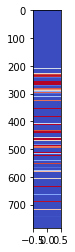

In [67]:
 plt.imshow(mnist.train.images[0].reshape(28,28).reshape(784,1),aspect=0.01,cmap='coolwarm')

In [ ]:
mnist 

In [68]:
# creating the model

In [184]:
input_ = tf.placeholder(dtype=tf.float32,shape=[None,784],name='input1')

In [185]:
W = tf.Variable(tf.zeros([784,10]))

In [186]:
b = tf.Variable(tf.zeros([10]))

In [187]:
y = tf.matmul(input_,W) + b

In [188]:
ytrue = tf.placeholder(dtype = tf.float32,shape=[None,10],name='output2')

In [189]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=ytrue,logits=y))

In [190]:
#init = tf.global_variables_initializer()

In [191]:
optimezer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [192]:
train =optimezer.minimize(cross_entropy)

In [193]:
init = tf.global_variables_initializer()

In [197]:
with tf.Session() as sess:
    sess.run(init)
    for steps in range(10000):
        batch_x,batch_y = mnist.train.next_batch(100)
        #print(batch_x.shape,batch_y.shape)
        sess.run(train,feed_dict={input_:batch_x,ytrue:batch_y,y:batch_y,x:batch_x})
    matches = tf.equal(tf.argmax(y,1),tf.argmax(ytrue,1))
    acc = tf.reduce_mean(tf.cast(matches,dtype=tf.float32))
    print(sess.run(acc,feed_dict={input_:mnist.test.images,ytrue:mnist.test.labels}))

0.6705


In [123]:
y.shape


TensorShape([Dimension(None), Dimension(10)])

<tf.Tensor 'Placeholder_2:0' shape=(?, 784) dtype=float32>

In [200]:
tf

<module 'tensorflow' from '/home/umang/anaconda3/envs/data_science_udemy/lib/python3.6/site-packages/tensorflow/__init__.py'>

In [201]:
###  Estimator functions and its output


In [202]:
import pandas as pd;


In [203]:
data = pd.read_csv('iris.csv')

In [204]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [206]:
data.columns = ['sepal_length','sepal_width','petal_length','petal_width','target']

In [207]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [210]:
data['target']=data['target'].apply(int)

In [211]:
data['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [212]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [213]:
y = data['target']
X = data.drop('target',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.3)

In [214]:
X_train.shape

(105, 4)

In [215]:
X_test.shape

(45, 4)

In [216]:
feat_cols = []
for cols in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(cols))

In [217]:
feat_cols

[_NumericColumn(key='sepal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='sepal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [218]:
input_fn = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,shuffle=True,batch_size=10)

In [219]:
classifer = tf.estimator.DNNClassifier(hidden_units=[20,10,10],n_classes=3,feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpbdjta3ay', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fbe2a647208>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [224]:
classifer.train(input_fn=input_fn,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbdjta3ay/model.ckpt-43
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 43 into /tmp/tmpbdjta3ay/model.ckpt.
INFO:tensorflow:loss = 2.7166848, step = 44
INFO:tensorflow:Saving checkpoints for 54 into /tmp/tmpbdjta3ay/model.ckpt.
INFO:tensorflow:Loss for final step: 1.7616495.


In [227]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=5,shuffle=False)

In [257]:
predictions = classifer.predict(input_fn=pred_fn)
final_preds= []
for pred in predictions:
    final_preds.append((pred['class_ids']))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbdjta3ay/model.ckpt-54
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [259]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(final_preds,y_test))

ValueError: Found input variables with inconsistent numbers of samples: [225, 45]

In [254]:
predictions = classifer.predict(input_fn=pred_fn)
predictions

<generator object Estimator.predict at 0x7fbe05ccca40>

In [251]:
from sklearn.metrics import confusion_matrix,classification_report;
print(classification_report(predictions_needed,y_test))
predictions_needed.shape

ValueError: Found input variables with inconsistent numbers of samples: [225, 45]

In [262]:

len(final_preds)

225

In [263]:
len(y_test)

45

In [264]:
X_test.shape

(45, 4)

In [265]:
pred_fn


<function tensorflow.python.estimator.inputs.pandas_io.pandas_input_fn.<locals>.input_fn()>

In [266]:
X_test.shape

(45, 4)

In [268]:
list(predictions).

AttributeError: 'list' object has no attribute 'shape'